In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
iris = pd.read_csv("Iris.csv") #loading dataset

In [3]:
iris.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [4]:
iris.info() # checking the inconsistency in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
# Id column is not useful so dropping the column
iris.drop('Id',axis=1,inplace=True)

In [6]:
iris.shape # checking shape of dataset

(150, 5)

In [7]:
iris['Species'].value_counts() # counting species of iris

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64

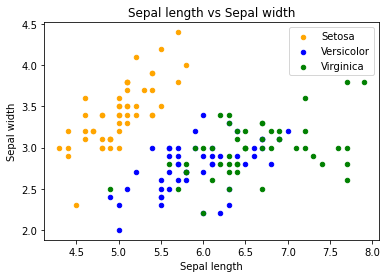

In [8]:
figure = iris[iris.Species == 'Iris-setosa'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='orange',label='Setosa')
iris[iris.Species == 'Iris-versicolor'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='blue',label='Versicolor',ax=figure)
iris[iris.Species == 'Iris-virginica'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='green',label='Virginica',ax=figure)
figure.set_xlabel("Sepal length")
figure.set_ylabel("Sepal width")
figure.set_title("Sepal length vs Sepal width")
plt.show()

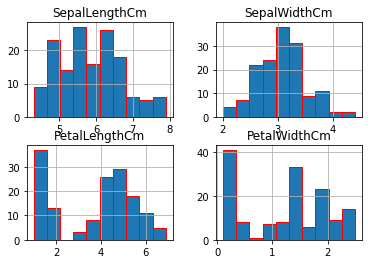

In [9]:
iris.hist(edgecolor='red',linewidth=1)
plt.show()

In [10]:
# I am trying to use support vector machine algorithm
from sklearn.model_selection import train_test_split
from sklearn import svm

In [11]:
# splitting data into train and test
train,test = train_test_split(iris,test_size=0.2)
print("Shape of train ",train.shape)
print("Shape of test ",test.shape)

Shape of train  (120, 5)
Shape of test  (30, 5)


In [12]:
x_train = train[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
y_train = train.Species 
x_test = test[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
y_test = test.Species

In [13]:
# Training model using svm
model = svm.SVC()
model.fit(x_train,y_train)

SVC()

In [14]:
prediction = model.predict(x_test)

In [15]:
prediction

array(['Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica'], dtype=object)

In [16]:
result = pd.DataFrame({'Actual Value':y_test,'Predicted Value':prediction})

In [17]:
result

,Actual Value,Predicted Value
61,Iris-versicolor,Iris-versicolor
133,Iris-virginica,Iris-virginica
83,Iris-versicolor,Iris-virginica
137,Iris-virginica,Iris-virginica
100,Iris-virginica,Iris-virginica
5,Iris-setosa,Iris-setosa
43,Iris-setosa,Iris-setosa
95,Iris-versicolor,Iris-versicolor
50,Iris-versicolor,Iris-versicolor
131,Iris-virginica,Iris-virginica


In [18]:
from sklearn import metrics # it will used to check accuracy of model

In [19]:
print("The accuracy of the model is ",metrics.accuracy_score(prediction,y_test))

The accuracy of the model is  0.9666666666666667


In [20]:
model.predict([[7,3.2,5,1.5]])

array(['Iris-versicolor'], dtype=object)